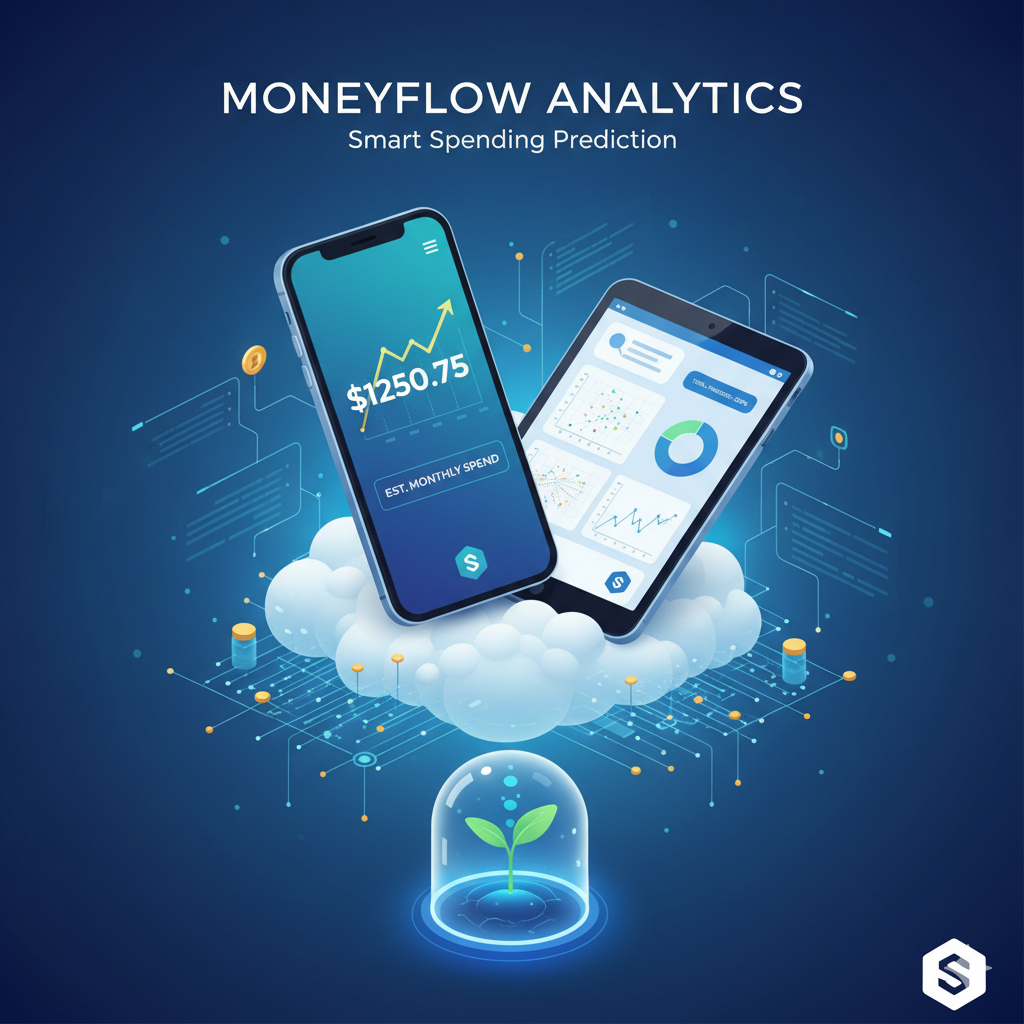

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
import pickle

In [54]:
df = pd.read_csv('/content/Ecommerce Customers')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [56]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [57]:
df.drop_duplicates(inplace = True)

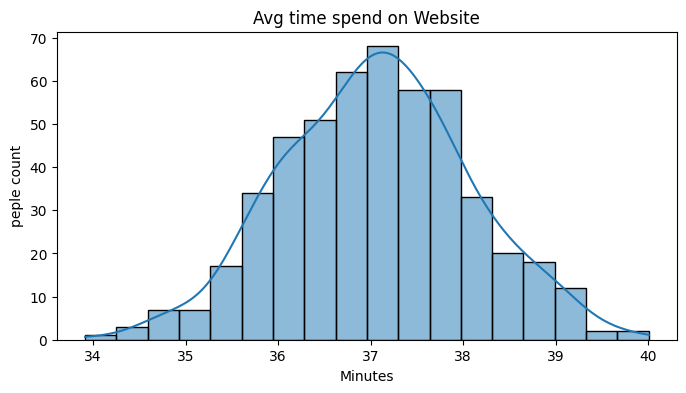

In [58]:
plt.figure(figsize= (8,4))

sns.histplot(df['Time on Website'],kde = True)
plt.title('Avg time spend on Website')
plt.xlabel('Minutes')
plt.ylabel('peple count')
plt.show()

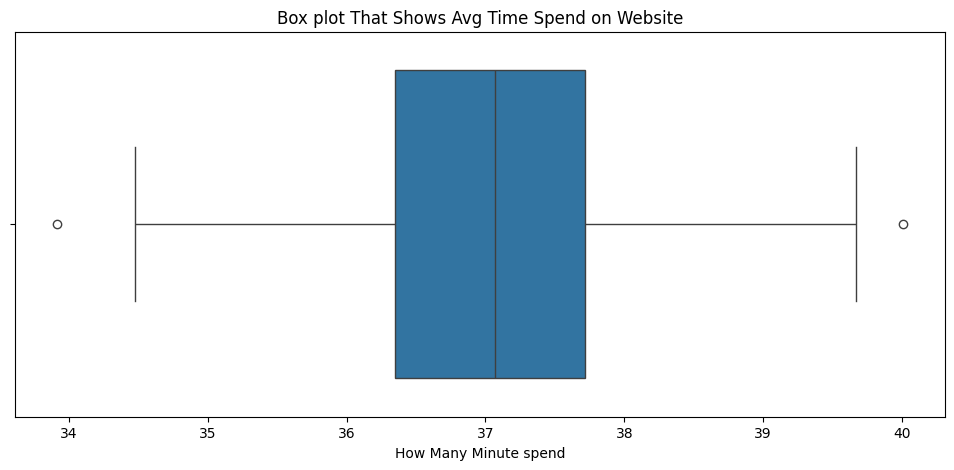

In [59]:
plt.figure(figsize = (12,5))
sns.boxplot(x = df['Time on Website'])
plt.title('Box plot That Shows Avg Time Spend on Website')
plt.xlabel('How Many Minute spend')
plt.show()

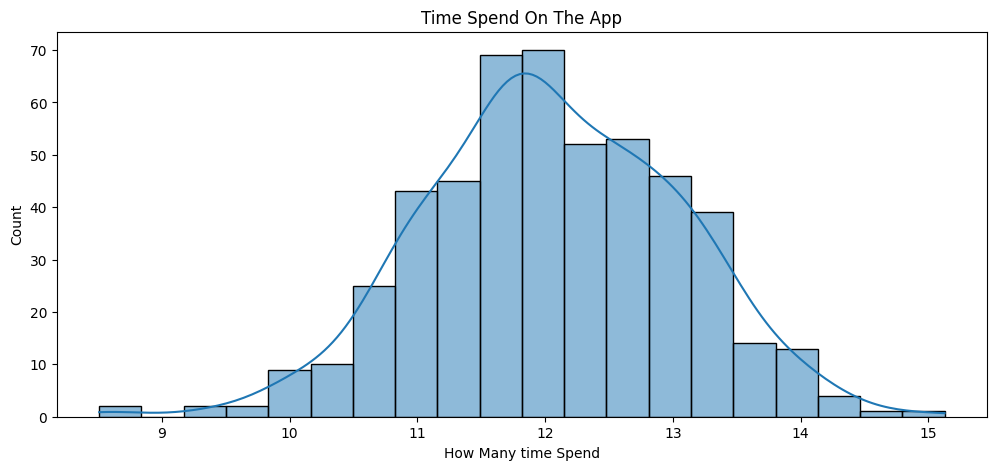

In [60]:
plt.figure(figsize = (12,5))

sns.histplot(df['Time on App'],kde = True)
plt.title('Time Spend On The App')
plt.xlabel('How Many time Spend')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Time on App'>

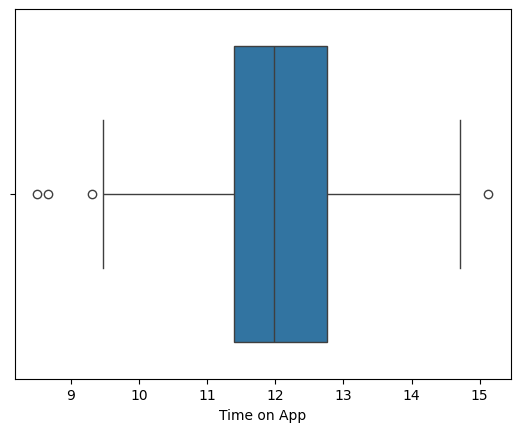

In [61]:
sns.boxplot(x = df['Time on App'])

In [62]:
# lets remove outlier from the dataset

Q1 = df['Time on App'].quantile(0.25)
Q3 = df['Time on App'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f'Lower Fence {lower_fence},Upper Fence {upper_fence}')

Lower Fence 9.3396088251313,Upper Fence 14.802394229583683


In [63]:
Q1 = df['Time on Website'].quantile(0.25)
Q3 = df['Time on Website'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print(f'Lower Fence {lower_fence},Upper Fence {upper_fence}')

Lower Fence 34.29849491039147,Upper Fence 39.76719469493466


In [64]:
df_cleaned = df[
(df['Time on Website'] >= lower_fence) & (df['Time on Website']<= upper_fence)]

In [65]:
df_cleaned

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


<Axes: xlabel='Time on Website', ylabel='Count'>

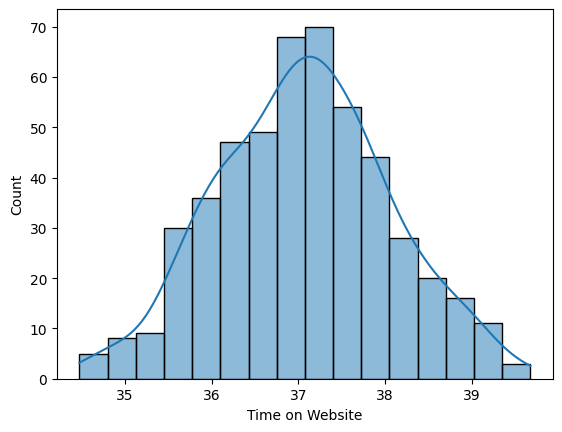

In [66]:
sns.histplot(df_cleaned['Time on Website'],kde = True)

<Axes: xlabel='Time on Website'>

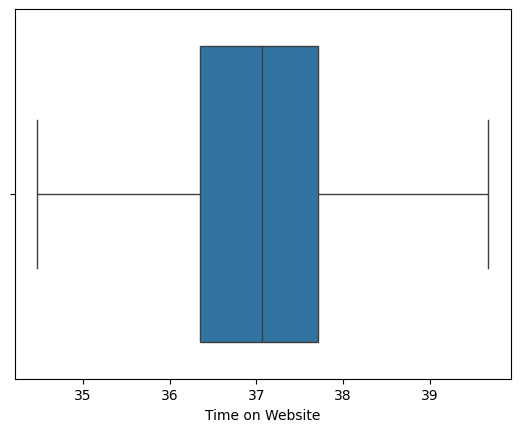

In [67]:
sns.boxplot(x =df_cleaned['Time on Website'])

In [68]:
# Converting The Categorical Columns into the numeric Data For ml Training
df_cleaned = pd.get_dummies(df_cleaned , drop_first = True)
df_cleaned

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_aaron11@luna.com,Email_aaron22@gmail.com,Email_aaron89@gmail.com,Email_acampbell@sanchez-velasquez.info,Email_acontreras@hotmail.com,Email_adam75@gmail.com,Email_adamperkins@terrell.com,Email_afry@ford.biz,Email_agolden@yahoo.com,Email_alejandro75@hotmail.com,Email_alexandermichael@hotmail.com,Email_alexandra26@summers-davis.com,Email_alicia28@fuller.com,Email_alicia85@lee.com,Email_allison80@carson-hansen.com,Email_alvaradoadam@jones-thompson.com,Email_alvareznancy@lucas.biz,Email_amanda03@yahoo.com,Email_amandadean@gmail.com,Email_amandastanley@yahoo.com,Email_amberchase@fowler.info,Email_andreperez@hotmail.com,Email_andrew06@peterson.com,Email_angela25@walker.com,Email_angelaphillips@gmail.com,Email_anneingram@miller-alexander.com,Email_annstone@hotmail.com,Email_anntaylor@hotmail.com,Email_anthony09@hotmail.com,Email_antonioharris@hotmail.com,Email_apark@walsh-obrien.net,Email_archeremily@baldwin.com,Email_arice@reynolds.info,Email_arnoldsamuel@wilson.com,Email_aschmidt@johnson.biz,...,Avatar_Orange,Avatar_OrangeRed,Avatar_Orchid,Avatar_PaleGoldenRod,Avatar_PaleGreen,Avatar_PaleTurquoise,Avatar_PaleVioletRed,Avatar_PapayaWhip,Avatar_PeachPuff,Avatar_Peru,Avatar_Pink,Avatar_PowderBlue,Avatar_Purple,Avatar_Red,Avatar_RosyBrown,Avatar_RoyalBlue,Avatar_SaddleBrown,Avatar_Salmon,Avatar_SandyBrown,Avatar_SeaGreen,Avatar_SeaShell,Avatar_Sienna,Avatar_Silver,Avatar_SkyBlue,Avatar_SlateBlue,Avatar_SlateGray,Avatar_Snow,Avatar_SpringGreen,Avatar_SteelBlue,Avatar_Tan,Avatar_Teal,Avatar_Thistle,Avatar_Tomato,Avatar_Turquoise,Avatar_Violet,Avatar_Wheat,Avatar_White,Avatar_WhiteSmoke,Avatar_Yellow,Avatar_YellowGreen
0,34.497268,12.655651,39.577668,4.082621,587.951054,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,31.926272,11.109461,37.268959,2.664034,392.204933,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,33.000915,11.330278,37.110597,4.104543,487.547505,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,34.305557,13.717514,36.721283,3.120179,581.852344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,33.330673,12.795189,37.536653,4.446308,599.406092,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [69]:
df_cleaned.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'Email_aaron11@luna.com',
       'Email_aaron22@gmail.com', 'Email_aaron89@gmail.com',
       'Email_acampbell@sanchez-velasquez.info',
       'Email_acontreras@hotmail.com',
       ...
       'Avatar_Teal', 'Avatar_Thistle', 'Avatar_Tomato', 'Avatar_Turquoise',
       'Avatar_Violet', 'Avatar_Wheat', 'Avatar_White', 'Avatar_WhiteSmoke',
       'Avatar_Yellow', 'Avatar_YellowGreen'],
      dtype='object', length=1136)

In [70]:
x = df_cleaned[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']]
y = df_cleaned['Yearly Amount Spent']

In [71]:
# train test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=12)

In [72]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [73]:
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

In [74]:
print(f'testing result : {mean_squared_error(y_test,y_pred)}')

testing result : 134.54389306764318


In [75]:
print(f'testing result : {r2_score(y_test,y_pred)}')
print(f'Training result :{mean_squared_error(y_train,y_train_pred)}')

testing result : 0.9750245603692952
Training result :90.16265608295289


In [79]:
df_cleaned.head(2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Email_aaron11@luna.com,Email_aaron22@gmail.com,Email_aaron89@gmail.com,Email_acampbell@sanchez-velasquez.info,Email_acontreras@hotmail.com,Email_adam75@gmail.com,Email_adamperkins@terrell.com,Email_afry@ford.biz,Email_agolden@yahoo.com,Email_alejandro75@hotmail.com,Email_alexandermichael@hotmail.com,Email_alexandra26@summers-davis.com,Email_alicia28@fuller.com,Email_alicia85@lee.com,Email_allison80@carson-hansen.com,Email_alvaradoadam@jones-thompson.com,Email_alvareznancy@lucas.biz,Email_amanda03@yahoo.com,Email_amandadean@gmail.com,Email_amandastanley@yahoo.com,Email_amberchase@fowler.info,Email_andreperez@hotmail.com,Email_andrew06@peterson.com,Email_angela25@walker.com,Email_angelaphillips@gmail.com,Email_anneingram@miller-alexander.com,Email_annstone@hotmail.com,Email_anntaylor@hotmail.com,Email_anthony09@hotmail.com,Email_antonioharris@hotmail.com,Email_apark@walsh-obrien.net,Email_archeremily@baldwin.com,Email_arice@reynolds.info,Email_arnoldsamuel@wilson.com,Email_aschmidt@johnson.biz,...,Avatar_Orange,Avatar_OrangeRed,Avatar_Orchid,Avatar_PaleGoldenRod,Avatar_PaleGreen,Avatar_PaleTurquoise,Avatar_PaleVioletRed,Avatar_PapayaWhip,Avatar_PeachPuff,Avatar_Peru,Avatar_Pink,Avatar_PowderBlue,Avatar_Purple,Avatar_Red,Avatar_RosyBrown,Avatar_RoyalBlue,Avatar_SaddleBrown,Avatar_Salmon,Avatar_SandyBrown,Avatar_SeaGreen,Avatar_SeaShell,Avatar_Sienna,Avatar_Silver,Avatar_SkyBlue,Avatar_SlateBlue,Avatar_SlateGray,Avatar_Snow,Avatar_SpringGreen,Avatar_SteelBlue,Avatar_Tan,Avatar_Teal,Avatar_Thistle,Avatar_Tomato,Avatar_Turquoise,Avatar_Violet,Avatar_Wheat,Avatar_White,Avatar_WhiteSmoke,Avatar_Yellow,Avatar_YellowGreen
0,34.497268,12.655651,39.577668,4.082621,587.951054,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,31.926272,11.109461,37.268959,2.664034,392.204933,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [82]:
model.predict([[32,12,35,4]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([497.29552546])

In [86]:
with open('best_pickle.pkl', 'wb') as f:
    pickle.dump(model, f)